<a href="https://colab.research.google.com/github/belikeamitesh/CS306-Machine-Learning/blob/main/Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [ ]:
ds_x, ds_y = load_iris(True)
m = ds_y.shape[0]

In [ ]:
index = []
for i in range(m):
  if ds_y[i] == 2:
    index.append(i)

ds_x = np.delete(ds_x, index, axis=0)
ds_y = np.delete(ds_y, index)

In [ ]:
 m = ds_y.shape[0]
 m

100

In [ ]:
ds_x = normalize(ds_x)


In [ ]:
one_x = np.ones((m,1))
ds_x = np.append(one_x, ds_x, axis=1)
n = ds_x.shape[1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ds_x, ds_y, test_size=0.6, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(30, 5)
(10, 5)
(60, 5)


In [ ]:
alpha_list = [10, 20, 1, 0.1, 0.01]
rho_list = [0.0001, 0.0001, 0.0001, 0.00001, 0.000001]
epoch_list = [1000, 0.0001, 1000, 2000, 3000]

In [ ]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def hypothesis(w, x): 
  return sigmoid((w*x).sum())

In [ ]:
def get_mse(h_x, y):
  return ((h_x-y)*(h_x-y)).sum()/(y.shape[0]*2)

In [ ]:
def logistic_regression(inp, out, hyper_i):
  alpha, rho, epoch = alpha_list[hyper_i], rho_list[hyper_i], epoch_list[hyper_i]
  m = inp.shape[0]
  np.random.seed(42)
  w = np.random.rand(n) # initilalization
  h_x = [hypothesis(w, inp[i, :]) for i in range(m)]  
  # print('initial w:')
  # print(w)
  mse = get_mse(h_x, out)
  mse_list = [mse]
  itr = 1
  while(True):
    new_w = [0 for i in range(n)]
    for j in range(n):
      # wj = wj - alpha*(summation)/m
      summation = 0
      for i in range(m):
        summation += (h_x[i] - out[i]) * inp[i,j] * (h_x[i]) * (1-h_x[i])
      new_w[j] = w[j] - alpha * summation / m
    h_x = [hypothesis(new_w, inp[i, :]) for i in range(m)]  
    new_mse = get_mse(h_x, out)
    # print(abs(new_mse - mse))
    if abs(new_mse - mse) <= rho:
      break
    w = new_w
    mse = new_mse
    mse_list.append(new_mse)
    # if(mse >= 234243242323434):
    #   break
    if(itr > epoch): 
      break
    itr += 1
  # print('ecochs: ', itr)
  return mse_list

Train Set

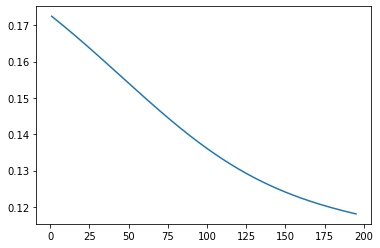

final mse:  0.11808349422050518


In [ ]:
train_result = logistic_regression(x_train, y_train, 0)
epoch = [(i+1) for i in range(len(train_result))]
plt.plot(epoch, train_result)
plt.show()
print('final mse: ', train_result[-1])

Validation Set 


0


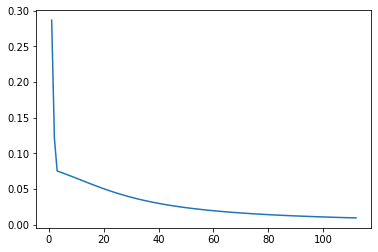

final mse:  0.009328519589058368
1


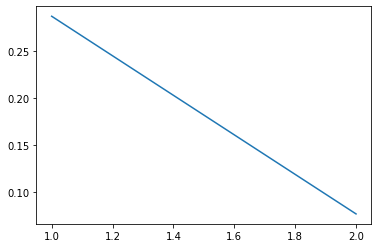

final mse:  0.07730066821091812
2


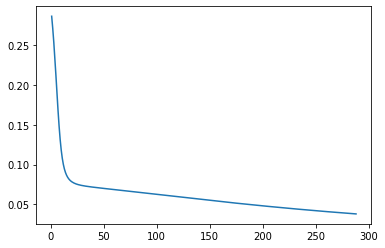

final mse:  0.03800697395502239
3


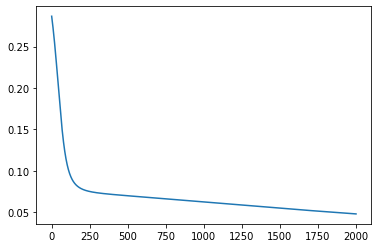

final mse:  0.04796668679012951
4


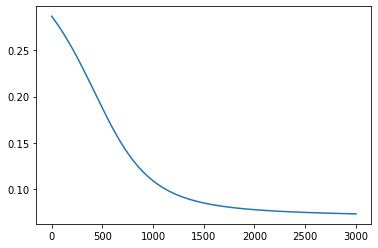

final mse:  0.073458301691081


In [ ]:
for j in range(5):
  val_result = logistic_regression(x_val, y_val, j)
  epoch = [(i+1) for i in range(len(val_result))]
  plt.plot(epoch, val_result)
  plt.show()
  print('final mse: ', val_result[-1])

**Overfitting Check**

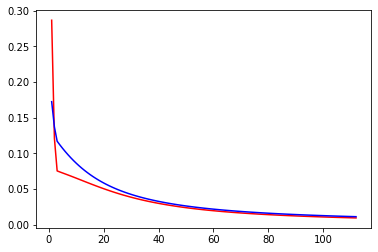

In [ ]:
val_result = logistic_regression(x_val, y_val, 0)
train_result = logistic_regression(x_train, y_train, 0)
size = min(len(val_result), len(train_result))
epoch = [(i+1) for i in range(size)]
plt.plot(epoch, val_result[:size], label = 'validation', color='red')
plt.plot(epoch, train_result[:size], label = 'training', color='blue')
plt.show()

Finalized Testing

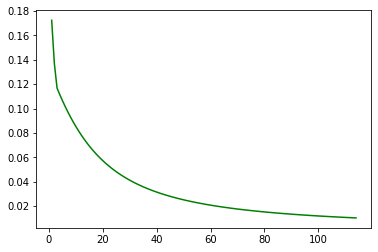

final testing mse:  0.01041375496122869


In [ ]:
test_result = logistic_regression(x_test, y_test, 0)
epoch = [(i+1) for i in range(len(test_result))]
plt.plot(epoch, test_result, label = 'testing', color='green')
plt.show()
print('final testing mse: ', test_result[-1])